In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd   /content/drive/MyDrive/

/content/drive/MyDrive


In [7]:
!ls

'7 Jul 2020 15:16:37.jpeg'		 'Photo album.gslides'
'7 Jul 2020 15:17:04.jpeg'		  Portfolio.gslides
'7 Jul 2020 15:17:24.jpeg'		  Project
'7 Jul 2020 15:17:43.jpeg'		  Projects
'Ahaliya S kumar.jpg'			  R_Module_3_Notes.gdoc
'Ahaliya S Kumar.pdf'			  RSVP.gform
 Classroom				 'To-do list.gsheet'
'CLUSTERING AND K-MEANS CLUSTERING.mp4'  'Untitled form (1).gform'
'Colab Notebooks'			 'Untitled form (2).gform'
'Contact Information.gform'		 'Untitled form.gform'
 Cyber_bulling				 'Untitled presentation (1).gslides'
 CYBERBULLYING				 'Untitled presentation (2).gslides'
'Cyberbullying_Abstract (1).pdf'	 'Untitled presentation (3).gslides'
 Cyberbullying_Abstract.pdf		 'Untitled presentation.gslides'
'design of experiments.gdoc'		 'Untitled spreadsheet-1.xlsx'
'Getting started.pdf'			 'Your big idea.gslides'
 Payment.pdf


In [8]:
%cd drive/MyDrive/

[Errno 2] No such file or directory: 'drive/MyDrive/'
/content/drive/MyDrive


In [9]:
%cd Cyber_bulling/

/content/drive/MyDrive/Cyber_bulling


In [10]:
import numpy as np
import pandas as pd
from tensorflow.python import keras
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding,LSTM,Conv1D,GlobalMaxPooling1D,Flatten,MaxPooling1D,GRU,SpatialDropout1D,Bidirectional
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
print(os.listdir("."))
import seaborn as sns
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")

['cyberbullying_tweets.csv', 'model.json', 'model.h5']


In [11]:
df=pd.read_csv('cyberbullying_tweets.csv')
df.head(10)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying


In [12]:
import re
def remove_special_character_And_punctuation(text):
    clean_txt = re.sub(r"[^\w\s]","",text)
    return clean_txt
df['tweet_text'] = df['tweet_text'].apply(remove_special_character_And_punctuation)

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
def tokenization(text):
    return nltk.word_tokenize(text)

df['Tokens'] = df['tweet_text'].apply(tokenization)

In [15]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
def remove_stopword(list_of_word):
    filtered_word = [word  for word in list_of_word if word.lower() not in stop_words]
    return filtered_word

df['Process_Tokens'] = df['Tokens'].apply(remove_stopword)

In [17]:
from nltk.stem import WordNetLemmatizer , PorterStemmer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
def stemming(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

df['stemmed_Tokens'] = df['Process_Tokens'].apply(stemming)

In [19]:
def tokens_to_word(li):
    return ' '.join(li)
df['tt'] = df['stemmed_Tokens'].apply(tokens_to_word)

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['cyberbullying_type'] = label_encoder.fit_transform(df['cyberbullying_type'])
df['cyberbullying_type']

0        3
1        3
2        3
3        3
4        3
        ..
47687    1
47688    1
47689    1
47690    1
47691    1
Name: cyberbullying_type, Length: 47692, dtype: int64

### Get class labels


In [21]:
Labels=list(label_encoder.inverse_transform([0, 1, 2,3,4,5]))


In [22]:
df['cyberbullying_type'].value_counts().index

Int64Index([5, 0, 2, 1, 3, 4], dtype='int64')

In [57]:
X = df['tt']
y = df['cyberbullying_type']

In [58]:
df

,tweet_text,cyberbullying_type,Tokens,Process_Tokens,stemmed_Tokens,tt
0,In other words katandandre your food was crapi...,3,"[In, other, words, katandandre, your, food, wa...","[words, katandandre, food, crapilicious, mkr]","[word, katandandr, food, crapilici, mkr]",word katandandr food crapilici mkr
1,Why is aussietv so white MKR theblock ImACeleb...,3,"[Why, is, aussietv, so, white, MKR, theblock, ...","[aussietv, white, MKR, theblock, ImACelebrityA...","[aussietv, white, mkr, theblock, imacelebritya...",aussietv white mkr theblock imacelebrityau tod...
2,XochitlSuckkks a classy whore Or more red velv...,3,"[XochitlSuckkks, a, classy, whore, Or, more, r...","[XochitlSuckkks, classy, whore, red, velvet, c...","[xochitlsuckkk, classi, whore, red, velvet, cu...",xochitlsuckkk classi whore red velvet cupcak
3,Jason_Gio meh P thanks for the heads up but n...,3,"[Jason_Gio, meh, P, thanks, for, the, heads, u...","[Jason_Gio, meh, P, thanks, heads, concerned, ...","[jason_gio, meh, p, thank, head, concern, anot...",jason_gio meh p thank head concern anoth angri...
4,RudhoeEnglish This is an ISIS account pretendi...,3,"[RudhoeEnglish, This, is, an, ISIS, account, p...","[RudhoeEnglish, ISIS, account, pretending, Kur...","[rudhoeenglish, isi, account, pretend, kurdish...",rudhoeenglish isi account pretend kurdish acco...
...,...,...,...,...,...,...
47687,Black ppl arent expected to do anything depend...,1,"[Black, ppl, arent, expected, to, do, anything...","[Black, ppl, arent, expected, anything, depend...","[black, ppl, arent, expect, anyth, depend, any...",black ppl arent expect anyth depend anyth yet ...
47688,Turner did not withhold his disappointment Tur...,1,"[Turner, did, not, withhold, his, disappointme...","[Turner, withhold, disappointment, Turner, cal...","[turner, withhold, disappoint, turner, call, c...",turner withhold disappoint turner call court a...
47689,I swear to God This dumb nigger bitch I have g...,1,"[I, swear, to, God, This, dumb, nigger, bitch,...","[swear, God, dumb, nigger, bitch, got, bleach,...","[swear, god, dumb, nigger, bitch, got, bleach,...",swear god dumb nigger bitch got bleach hair re...
47690,Yea fuck you RT therealexel IF YOURE A NIGGER ...,1,"[Yea, fuck, you, RT, therealexel, IF, YOURE, A...","[Yea, fuck, RT, therealexel, YOURE, NIGGER, FU...","[yea, fuck, rt, therealexel, your, nigger, fuc...",yea fuck rt therealexel your nigger fuck unfol...


In [59]:
nltk.download('stopwords')
eng_stops = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
cv = CountVectorizer()
X_scaled = cv.fit_transform(X)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)


In [30]:
#SVM
from sklearn import svm
svm_class= svm.SVC()
svm_class.fit(X_train,y_train)
y_pred=svm_class.predict(X_test)
Accuracy_Svm=round((metrics.accuracy_score(y_test, y_pred)*100),2)
print('Accuracy: ',Accuracy_Svm,"%")

Accuracy:  83.41 %


In [31]:
from sklearn.metrics import classification_report
targets=['class 0','class 1','class 2','class 3','class 4','class 5']
print(classification_report(y_test,y_pred,target_names=targets))

              precision    recall  f1-score   support

     class 0       0.98      0.97      0.97      2333
     class 1       0.98      0.98      0.98      2366
     class 2       0.90      0.83      0.87      2440
     class 3       0.68      0.46      0.55      2391
     class 4       0.58      0.82      0.68      2329
     class 5       0.95      0.94      0.94      2449

    accuracy                           0.83     14308
   macro avg       0.84      0.83      0.83     14308
weighted avg       0.85      0.83      0.83     14308



In [32]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_class=KNeighborsClassifier()
knn_class.fit(X_train,y_train)
y_pred=knn_class.predict(X_test)
Accuracy_Knn=round((metrics.accuracy_score(y_test, y_pred)*100),2)
print('Accuracy: ',Accuracy_Knn,"%")


Accuracy:  69.4 %


In [33]:
from sklearn.metrics import classification_report
targets=['class 0','class 1','class 2','class 3','class 4','class 5']
print(classification_report(y_test,y_pred,target_names=targets))

              precision    recall  f1-score   support

     class 0       0.96      0.96      0.96      2333
     class 1       0.99      0.86      0.92      2366
     class 2       0.77      0.73      0.75      2440
     class 3       0.38      0.57      0.45      2391
     class 4       0.38      0.40      0.39      2329
     class 5       0.99      0.66      0.79      2449

    accuracy                           0.69     14308
   macro avg       0.75      0.69      0.71     14308
weighted avg       0.75      0.69      0.71     14308



In [34]:
#NAVIE_BAYES
from sklearn.naive_bayes import MultinomialNB
NB=MultinomialNB()
NB.fit(X_train,y_train)
y_pred=NB.predict(X_test)
Accuracy_NB=round((metrics.accuracy_score(y_test, y_pred)*100),2)
print('Accuracy: ',Accuracy_NB,"%")

Accuracy:  77.07 %


In [35]:

targets=['class 0','class 1','class 2','class 3','class 4','class 5']
print(classification_report(y_test,y_pred,target_names=targets))

              precision    recall  f1-score   support

     class 0       0.71      0.99      0.83      2333
     class 1       0.84      0.94      0.89      2366
     class 2       0.84      0.84      0.84      2440
     class 3       0.70      0.36      0.48      2391
     class 4       0.65      0.50      0.57      2329
     class 5       0.82      0.98      0.89      2449

    accuracy                           0.77     14308
   macro avg       0.76      0.77      0.75     14308
weighted avg       0.76      0.77      0.75     14308



In [36]:
#DECISION_TREE
from sklearn.tree import DecisionTreeClassifier
random_class=DecisionTreeClassifier(criterion='entropy', random_state=0)
random_class.fit(X_train, y_train)
y_pred= random_class.predict(X_test)
Accuracy_DT=round((metrics.accuracy_score(y_test, y_pred)*100),2)
print('Accuracy: ',Accuracy_DT,"%")


Accuracy:  78.74 %


In [37]:
targets=['class 0','class 1','class 2','class 3','class 4','class 5']
print(classification_report(y_test,y_pred,target_names=targets))

              precision    recall  f1-score   support

     class 0       0.98      0.96      0.97      2333
     class 1       0.98      0.97      0.98      2366
     class 2       0.83      0.85      0.84      2440
     class 3       0.48      0.49      0.49      2391
     class 4       0.51      0.50      0.51      2329
     class 5       0.94      0.94      0.94      2449

    accuracy                           0.79     14308
   macro avg       0.79      0.79      0.79     14308
weighted avg       0.79      0.79      0.79     14308



In [42]:
#RANDOM_FOREST
from sklearn.ensemble import RandomForestClassifier
random_class= RandomForestClassifier(n_estimators= 200, criterion="entropy")
random_class.fit(X_train, y_train)
y_pred= random_class.predict(X_test)
Accuracy_RF=round((metrics.accuracy_score(y_test, y_pred)*100),2)
print('Accuracy: ',Accuracy_RF,"%")

Accuracy:  81.55 %


In [43]:
targets=['class 0','class 1','class 2','class 3','class 4','class 5']
print(classification_report(y_test,y_pred,target_names=targets))

              precision    recall  f1-score   support

     class 0       0.97      0.98      0.97      2333
     class 1       0.98      0.99      0.98      2366
     class 2       0.89      0.83      0.86      2440
     class 3       0.56      0.53      0.54      2391
     class 4       0.55      0.61      0.58      2329
     class 5       0.95      0.96      0.95      2449

    accuracy                           0.82     14308
   macro avg       0.82      0.81      0.82     14308
weighted avg       0.82      0.82      0.82     14308



In [38]:
# ADABOOST
from sklearn.ensemble import AdaBoostClassifier
AD_class=AdaBoostClassifier(n_estimators=50, learning_rate=1)
AD_class.fit(X_train, y_train)
y_pred = AD_class.predict(X_test)
Accuracy_AD=round((metrics.accuracy_score(y_test, y_pred)*100),2)
print('Accuracy: ',Accuracy_AD,"%")

Accuracy:  78.87 %


In [39]:
targets=['class 0','class 1','class 2','class 3','class 4','class 5']
print(classification_report(y_test,y_pred,target_names=targets))

              precision    recall  f1-score   support

     class 0       0.93      0.97      0.95      2333
     class 1       0.97      0.97      0.97      2366
     class 2       0.91      0.78      0.84      2440
     class 3       0.64      0.20      0.31      2391
     class 4       0.49      0.88      0.63      2329
     class 5       0.93      0.93      0.93      2449

    accuracy                           0.79     14308
   macro avg       0.81      0.79      0.77     14308
weighted avg       0.81      0.79      0.77     14308



In [40]:
#LOGISTIC
from sklearn.linear_model import LogisticRegression
LR_class= LogisticRegression(random_state=0)
LR_class.fit(X_train, y_train)
y_pred = LR_class.predict(X_test)
Accuracy_LR=round((metrics.accuracy_score(y_test, y_pred)*100),2)
print('Accuracy: ',Accuracy_LR,"%")

Accuracy:  82.44 %


In [41]:
targets=['class 0','class 1','class 2','class 3','class 4','class 5']
print(classification_report(y_test,y_pred,target_names=targets))

              precision    recall  f1-score   support

     class 0       0.97      0.97      0.97      2333
     class 1       0.98      0.98      0.98      2366
     class 2       0.89      0.84      0.87      2440
     class 3       0.58      0.56      0.57      2391
     class 4       0.58      0.65      0.61      2329
     class 5       0.96      0.93      0.95      2449

    accuracy                           0.82     14308
   macro avg       0.83      0.82      0.83     14308
weighted avg       0.83      0.82      0.83     14308



<Axes: xlabel='cyberbullying_type', ylabel='count'>

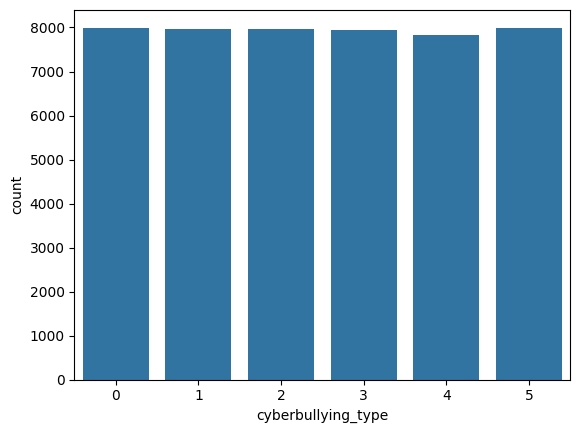

In [44]:
# DATA VISUALIZATION
sns.countplot(x='cyberbullying_type',data=df)

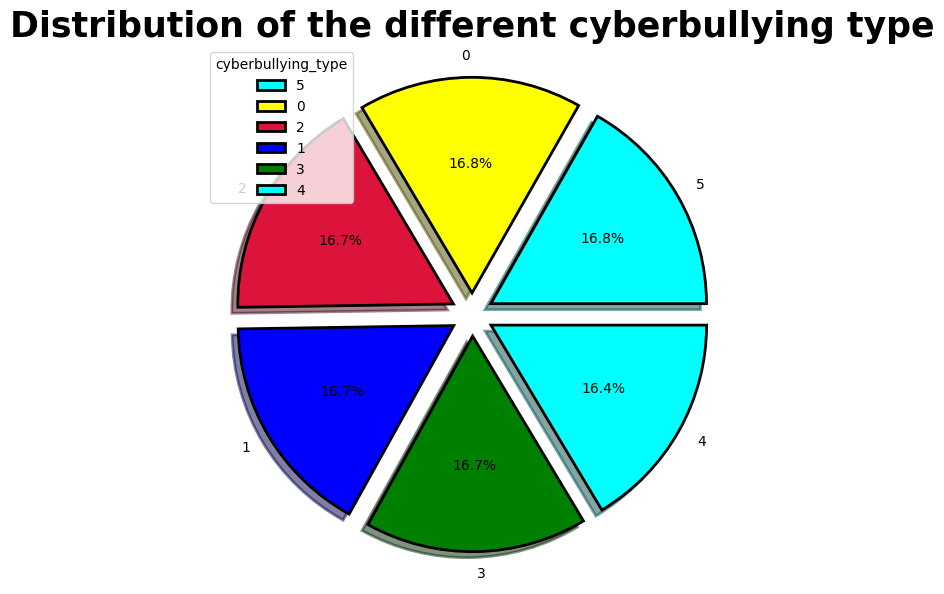

In [45]:
fig=plt.figure(figsize=(7,7))
colors=("cyan","yellow","crimson","blue","green")
wp={'linewidth':2,'edgecolor':"black"}
explode=(0.1,0.1,0.1,0.1,0.1,0.1)
tags=df['cyberbullying_type'].value_counts()
tags.plot(kind='pie',autopct="%1.1f%%",label='',colors=colors,explode=explode,shadow=True,wedgeprops=wp)
plt.legend(title="cyberbullying_type")
plt.title('Distribution of the different cyberbullying type',fontsize='25',fontweight='bold')
plt.show()


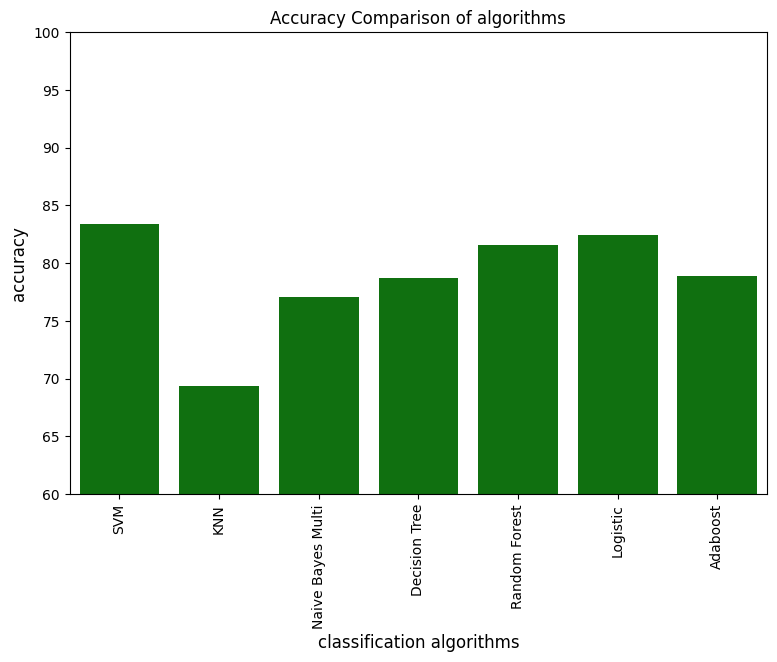

In [46]:
plt.figure(figsize=(9,6))
acc=[Accuracy_Svm,Accuracy_Knn,Accuracy_NB,Accuracy_DT,Accuracy_RF,Accuracy_LR,Accuracy_AD]
alg=['SVM','KNN','Naive Bayes Multi','Decision Tree','Random Forest','Logistic','Adaboost']
plt.ylim(60,100)

sns.barplot(x=alg, y=acc,color='green')
plt.xticks(rotation='vertical')

plt.xlabel('classification algorithms', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.title("Accuracy Comparison of algorithms")
plt.show()

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

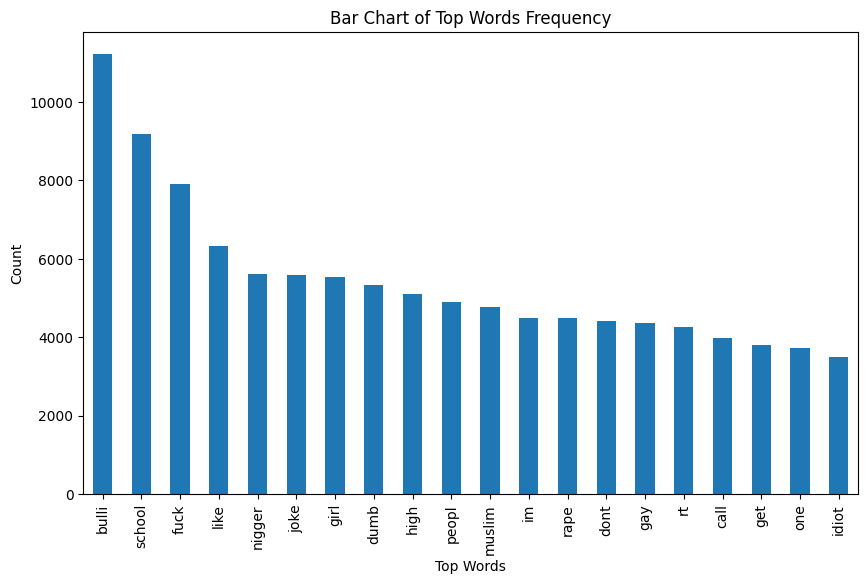

In [47]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
  vec = CountVectorizer().fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx])
        for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key=lambda x: x[1],
            reverse=True)
  return words_freq[:n]


common_words = get_top_n_words(df['tt'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(kind='bar',figsize=(10, 6), xlabel="Top Words", ylabel="Count", title="Bar Chart of Top Words Frequency")

In [39]:
y=to_categorical(df.cyberbullying_type)

In [40]:
df

,tweet_text,cyberbullying_type,Tokens,Process_Tokens,stemmed_Tokens,tt
0,In other words katandandre your food was crapi...,3,"[In, other, words, katandandre, your, food, wa...","[words, katandandre, food, crapilicious, mkr]","[word, katandandr, food, crapilici, mkr]",word katandandr food crapilici mkr
1,Why is aussietv so white MKR theblock ImACeleb...,3,"[Why, is, aussietv, so, white, MKR, theblock, ...","[aussietv, white, MKR, theblock, ImACelebrityA...","[aussietv, white, mkr, theblock, imacelebritya...",aussietv white mkr theblock imacelebrityau tod...
2,XochitlSuckkks a classy whore Or more red velv...,3,"[XochitlSuckkks, a, classy, whore, Or, more, r...","[XochitlSuckkks, classy, whore, red, velvet, c...","[xochitlsuckkk, classi, whore, red, velvet, cu...",xochitlsuckkk classi whore red velvet cupcak
3,Jason_Gio meh P thanks for the heads up but n...,3,"[Jason_Gio, meh, P, thanks, for, the, heads, u...","[Jason_Gio, meh, P, thanks, heads, concerned, ...","[jason_gio, meh, p, thank, head, concern, anot...",jason_gio meh p thank head concern anoth angri...
4,RudhoeEnglish This is an ISIS account pretendi...,3,"[RudhoeEnglish, This, is, an, ISIS, account, p...","[RudhoeEnglish, ISIS, account, pretending, Kur...","[rudhoeenglish, isi, account, pretend, kurdish...",rudhoeenglish isi account pretend kurdish acco...
...,...,...,...,...,...,...
47687,Black ppl arent expected to do anything depend...,1,"[Black, ppl, arent, expected, to, do, anything...","[Black, ppl, arent, expected, anything, depend...","[black, ppl, arent, expect, anyth, depend, any...",black ppl arent expect anyth depend anyth yet ...
47688,Turner did not withhold his disappointment Tur...,1,"[Turner, did, not, withhold, his, disappointme...","[Turner, withhold, disappointment, Turner, cal...","[turner, withhold, disappoint, turner, call, c...",turner withhold disappoint turner call court a...
47689,I swear to God This dumb nigger bitch I have g...,1,"[I, swear, to, God, This, dumb, nigger, bitch,...","[swear, God, dumb, nigger, bitch, got, bleach,...","[swear, god, dumb, nigger, bitch, got, bleach,...",swear god dumb nigger bitch got bleach hair re...
47690,Yea fuck you RT therealexel IF YOURE A NIGGER ...,1,"[Yea, fuck, you, RT, therealexel, IF, YOURE, A...","[Yea, fuck, RT, therealexel, YOURE, NIGGER, FU...","[yea, fuck, rt, therealexel, your, nigger, fuc...",yea fuck rt therealexel your nigger fuck unfol...


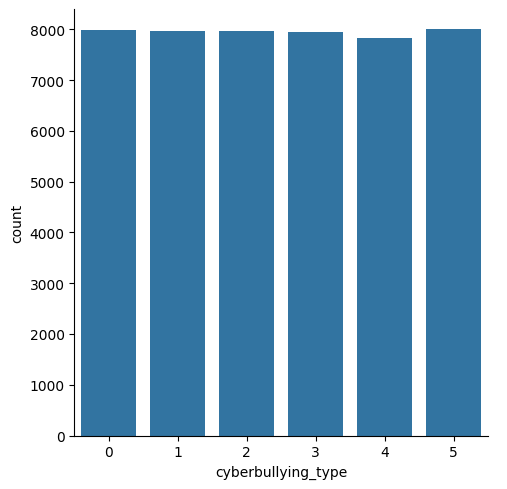

In [62]:
sns.catplot(x='cyberbullying_type',kind='count',data=df)

In [66]:
import matplotlib.pyplot as plt

In [68]:
print(df.columns)

Index(['tweet_text', 'cyberbullying_type', 'Tokens', 'Process_Tokens',
       'stemmed_Tokens', 'tt'],
      dtype='object')


In [70]:
for bully in df['cyberbullying_type'].unique():
    top_50_words=df.tweet_text[df['cyberbullying_type']==bully].str.split(expand=True).stack().value_counts()[:51]
top_50_words

the          4879
dumb         4390
a            3774
nigger       3685
you          3400
to           3166
fuck         3013
and          2812
I            2317
is           2121
ass          2077
of           2019
that         1801
in           1635
black        1582
u            1513
FUCK         1501
white        1230
it           1159
are          1145
RT           1137
for          1096
people       1077
niggers      1003
as            987
OBAMA         978
this          969
my            957
on            956
tayyoung_     923
like          905
one           890
me            881
ur            876
not           862
your          861
called        859
be            829
i             785
was           771
with          755
so            742
up            733
but           720
have          708
all           691
dont          688
bitch         682
first         671
anything      667
past          656
dtype: int64

In [71]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

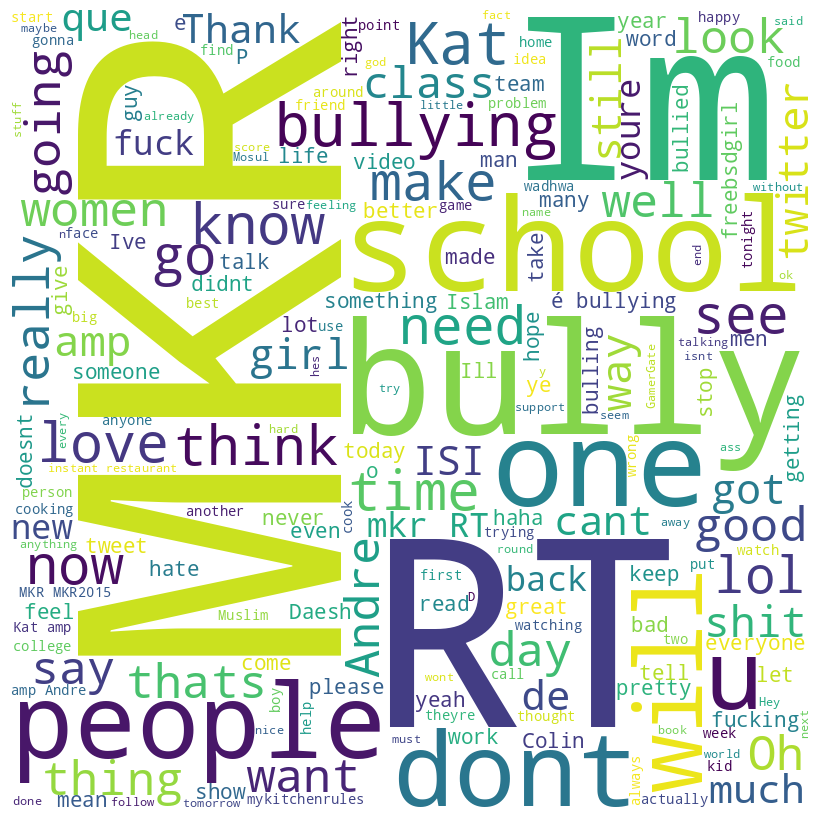

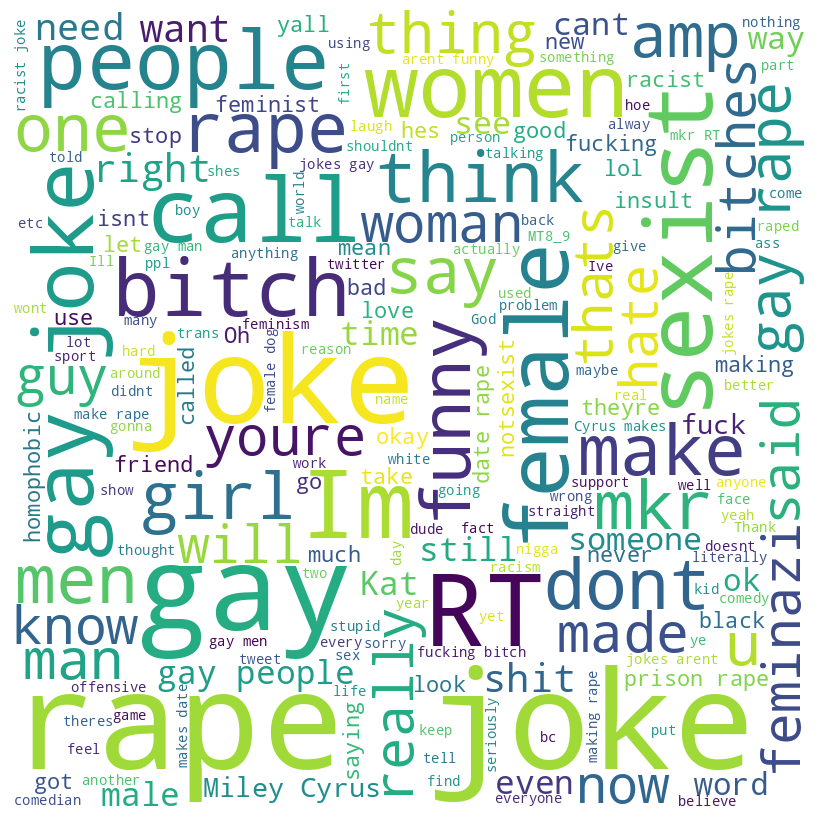

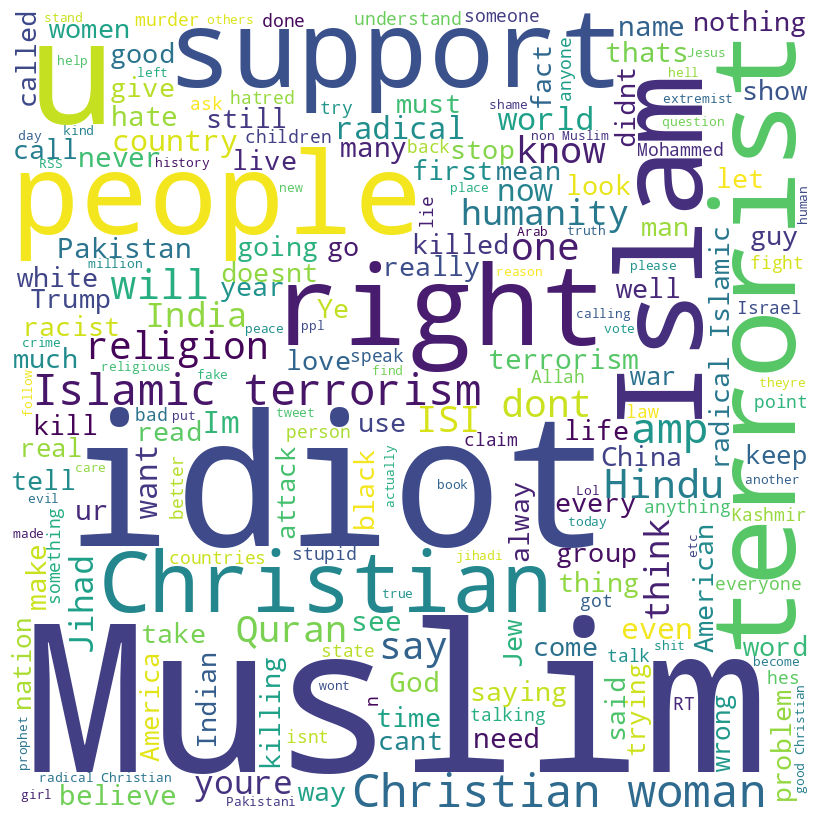

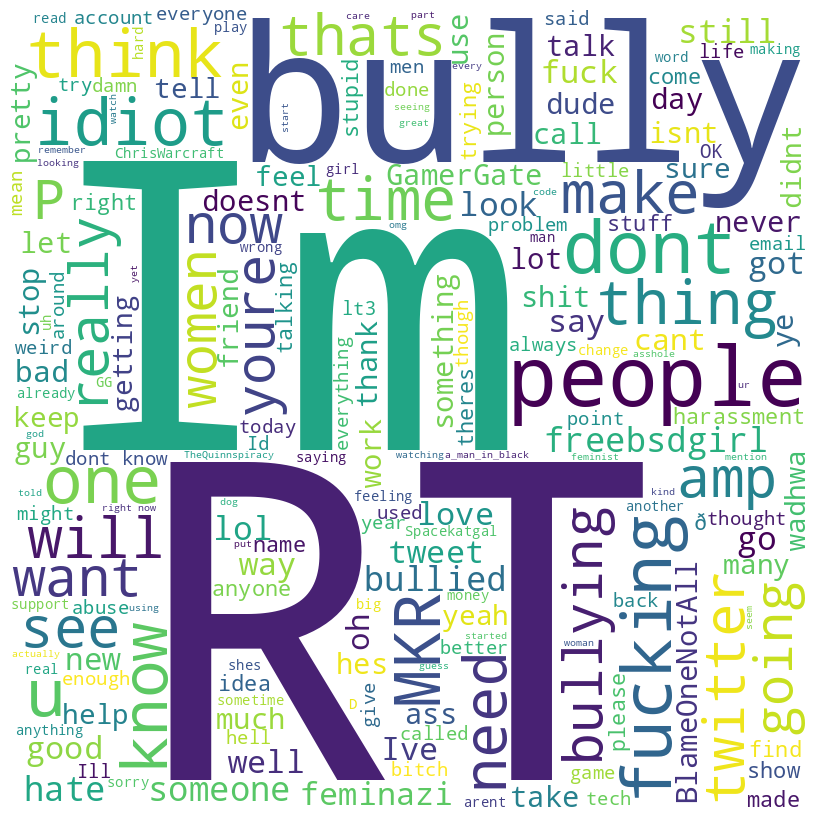

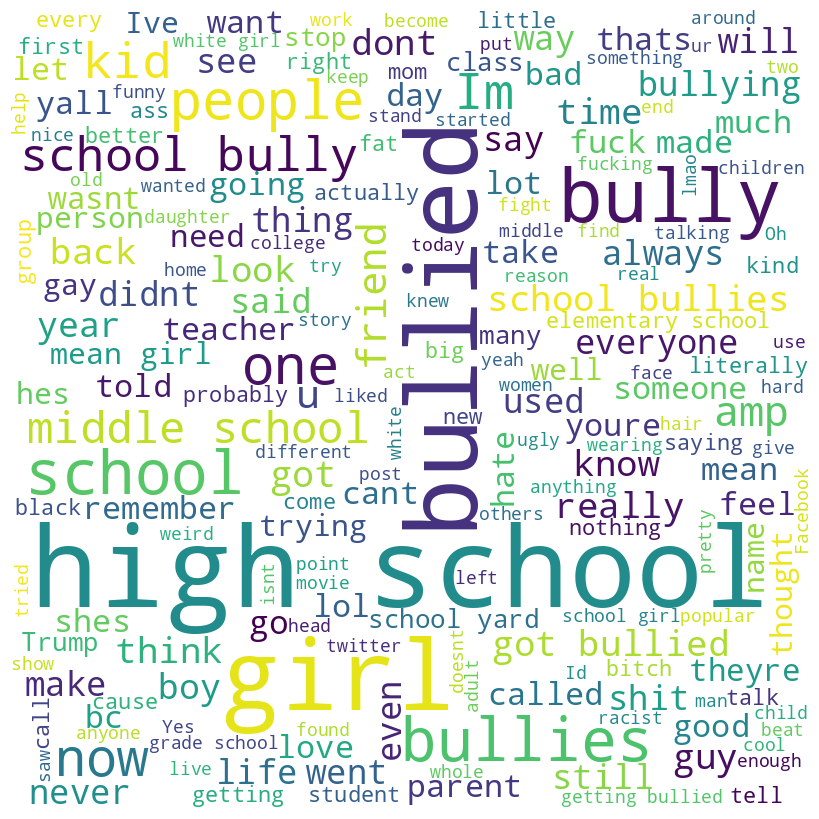

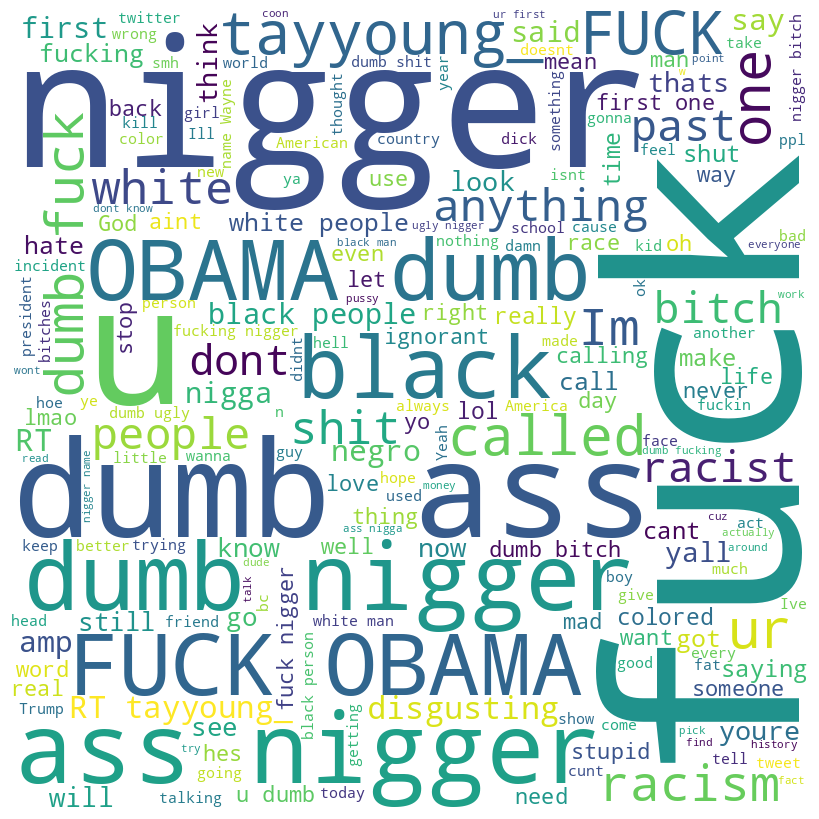

In [73]:
for bully in df.cyberbullying_type.unique():
    s=''
    for phrases in df.tweet_text[df.cyberbullying_type==bully]:
        s=s+' '+phrases.strip()

    wordcloud=WordCloud(width=800,height=800,background_color='white',stopwords=STOPWORDS,min_font_size=10).generate(s)
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    print()

In [41]:
y

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [42]:
y

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [43]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(38153,) (38153, 6)
(9539,) (9539, 6)


In [44]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', min_df=0.0001)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
from scipy.sparse import csr_matrix
from nltk.tokenize import word_tokenize
from nltk import FreqDist

all_words=' '.join(X_train)
all_words=word_tokenize(all_words)
dist=FreqDist(all_words)
num_unique_word=len(dist)
num_unique_word

47759

In [47]:
MAX_REVIEW_LEN=0
for text in X_train:
    word=word_tokenize(text)
    l=len(word)
    MAX_REVIEW_LEN = max(MAX_REVIEW_LEN, l)

MAX_REVIEW_LEN

473

In [48]:
max_features = num_unique_word
max_words = MAX_REVIEW_LEN
batch_size = 32
epochs = 10
num_classes=6

In [49]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_test)


In [50]:
X_train[:5]

[[16, 10984, 413, 75, 172, 50, 1053, 553, 1810, 16243, 936, 4904, 108, 16244],
 [16245, 1094, 6, 15, 12, 1969, 12],
 [16,
  16246,
  16247,
  8769,
  2704,
  44,
  160,
  4038,
  20,
  1460,
  315,
  3443,
  6497,
  16248],
 [2400,
  626,
  177,
  111,
  20,
  3034,
  52,
  3154,
  59,
  41,
  17,
  1362,
  4548,
  37,
  69,
  17,
  1760,
  52,
  3035,
  533,
  17,
  20,
  2272,
  1694,
  48,
  1363,
  36,
  78,
  17,
  63,
  40,
  41],
 [10, 16249, 3, 8, 50, 78, 182, 356, 342, 22, 5, 189, 3]]

In [51]:
X_val[:5]

[[928, 275, 46, 1139, 123, 8, 3, 14, 3967, 3054, 156, 29, 5],
 [16, 357, 1487, 1887, 186, 955, 161, 1361, 306, 562, 1125, 32, 672],
 [445,
  530,
  149,
  41,
  10,
  36,
  4306,
  18,
  22,
  4878,
  562,
  651,
  69,
  1034,
  23,
  1222,
  3665,
  123,
  5,
  6,
  166,
  163,
  24,
  107,
  189,
  3],
 [16, 3072, 411, 526, 2059],
 [59, 44, 7877, 32]]

In [52]:
import tensorflow as tf
X_train =  tf.keras.utils.pad_sequences(X_train, maxlen=max_words)
X_val =  tf.keras.utils.pad_sequences(X_val, maxlen=max_words)
print(X_train.shape,X_val.shape)

(38153, 473) (9539, 473)


In [53]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Embedding(input_dim=100, output_dim=32, input_length=MAX_REVIEW_LEN))
model.add(Flatten())
model.add(Dense(16, activation="relu"))
model.add(Dense(6, activation="softmax"))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
1193/1193 [==============================] - 33s 25ms/step - loss: 0.2263 - accuracy: 0.6819
Epoch 2/50
1193/1193 [==============================] - 9s 8ms/step - loss: 0.1519 - accuracy: 0.7778
Epoch 3/50
1193/1193 [==============================] - 8s 7ms/step - loss: 0.1470 - accuracy: 0.7853
Epoch 4/50
1193/1193 [==============================] - 6s 5ms/step - loss: 0.1444 - accuracy: 0.7896
Epoch 5/50
1193/1193 [==============================] - 7s 6ms/step - loss: 0.1423 - accuracy: 0.7934
Epoch 6/50
1193/1193 [==============================] - 6s 5ms/step - loss: 0.1407 - accuracy: 0.7923
Epoch 7/50
1193/1193 [==============================] - 7s 6ms/step - loss: 0.1393 - accuracy: 0.7970
Epoch 8/50
1193/1193 [==============================] - 6s 5ms/step - loss: 0.1382 - accuracy: 0.7967
Epoch 9/50
1193/1193 [==============================] - 6s 5ms/step - loss: 0.1370 - accuracy: 0.7980
Epoch 10/50
1193/1193 [==============================] - 6s 5ms/step - loss: 0.1

In [54]:
model_json=model.to_json()
with open("model.json","w") as json_file:
     json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")



Saved model to disk


In [55]:
import tensorflow
from tensorflow.keras.models import model_from_json
json_file1=open('model.json','r')
loaded_model_json=json_file1.read()
json_file1.close()
loaded_model=model_from_json(loaded_model_json)

loaded_model.load_weights("model.h5")

print("Loaded model from disk")
loaded_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
score=loaded_model.evaluate(X_val,y_test,verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1],score[1]*100))

Loaded model from disk
accuracy: 77.17%


In [56]:

def predict_sentiment(text):
  text_seq = tokenizer.texts_to_sequences(text)
  text_pad = tf.keras.utils.pad_sequences(text_seq, maxlen=max_words)

  prediction = model.predict(text_pad).round()
  print(prediction)
  #print(label_encoder.inverse_transform(np.ravel(prediction).astype(int)))
  ind=np.argmax(prediction)
  #list(label_encoder.inverse_transform([0, 1, 2,3,4,5]))
  # if prediction==1.0:
  print(Labels[ind])
  #   print("It is a disaster tweet.")
  # else:
  #   print("It is not a disaster tweet.")

#text="word katandandr food crapilici mkr"
text="black ppl arent expect anyth depend anyth yet"
predict_sentiment([text])

1/1 [==============================] - 0s 138ms/step
[[0. 1. 0. 0. 0. 0.]]
ethnicity
